# Iris Flower Dataset Classification Using LazyClassifier

## The Iris Flower Dataset

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## Python Code

### Section 0: Load relevant materials

In [1]:
# Load relevant packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

from lazypredict.Supervised import LazyClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from pandas.plotting import scatter_matrix

In [2]:
# Load iris dataset
iris_data = datasets.load_iris()

### Section 1: Data exploration

In [3]:
iris_data.data.shape

(150, 4)

In [4]:
# View first ten rows
iris_data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Section 2: Data plotting

In [8]:
#df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
#scatter_matrix(df, alpha = 0.6, figsize = (8,8), diagonal = 'kde')

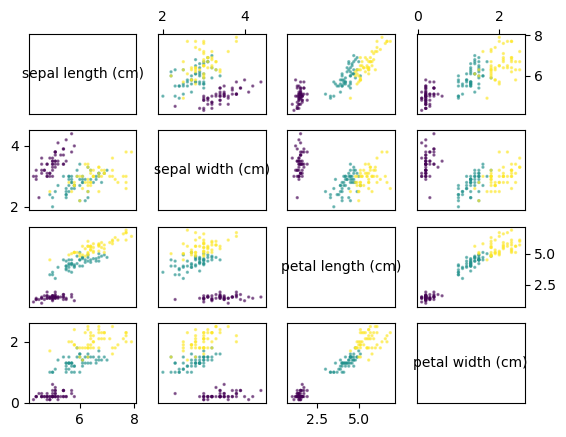

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=4)

# Plot data
for i in range(4):
    for j in range(4):
        if i != j:
            axs[i, j].scatter(x=iris_data.data[:,j], 
                              y=iris_data.data[:,i],
                              s=2,
                              c=iris_data.target, 
                              alpha=0.5)


for ax in axs.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Set up ticks only on one side for the "edge" subplots...
        if ax.get_subplotspec().is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.get_subplotspec().is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.get_subplotspec().is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.get_subplotspec().is_last_row():
            ax.xaxis.set_ticks_position('bottom')

# Turn on the proper x or y axes ticks.
for i, j in zip(range(4), itertools.cycle((-1, 0))):
        axs[j,i].xaxis.set_visible(True)
        axs[i,j].yaxis.set_visible(True)            
            
# Label the diagonal subplots...
for i, label in enumerate(iris_data.feature_names):
    axs[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',ha='center', va='center')       
        
plt.show()

# Source: https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib

### Section 3: Data mining using LazyClassifier

In [11]:
features = iris_data.data
target = iris_data.target
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=123)
model = LazyClassifier(verbose=0,
                       ignore_warnings=True,
                       custom_metric=None)
fitted_model, predictions = model.fit(feature_train, feature_test, target_train, target_test)

100%|██████████| 29/29 [00:00<00:00, 59.45it/s]


In [12]:
print(fitted_model)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.99               0.99    None      0.99   
AdaBoostClassifier                 0.97               0.98    None      0.97   
PassiveAggressiveClassifier        0.97               0.98    None      0.97   
LogisticRegression                 0.97               0.98    None      0.97   
GaussianNB                         0.97               0.98    None      0.97   
SGDClassifier                      0.96               0.96    None      0.96   
RandomForestClassifier             0.96               0.96    None      0.96   
QuadraticDiscriminantAnalysis      0.96               0.96    None      0.96   
Perceptron                         0.96               0.96    None      0.96   
LGBMClassifier                     0.96               0.96    None      0.96   
ExtraTreeClassifier                0.96 